In [1]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import math
np.random.random()
import random
import scipy.linalg as la
import sys
import trace

## Construct the transfer matrix at temperature $T$ with external field $B$

In [2]:
def transfer_matrix(T,B):
    kb = 1.0; #boltzman constant
    beta = 1/(kb*T);
    J = 1.0;
    x = np.array(([math.exp( beta*J+beta*B ),math.exp( -beta*J )],[ math.exp( -beta*J ),math.exp( beta*J-beta*B )]))
    T = np.asmatrix(x)
    return T


In [3]:
P=transfer_matrix(T=60,B=20)
print('Transfer Matrix of P(T=60,B=20)')
P

Transfer Matrix of P(T=60,B=20)


matrix([[1.41906755, 0.98347145],
        [0.98347145, 0.72857357]])

## Find the eivenvalues of the transfer matrix and compare to the exact results

In [4]:
A = transfer_matrix(T=60,B=20);
results = la.eig(A);
print('Calculate the eigenvlaue of A by pyhthon code')
print('=====================================')
print('Transfer Matrix is')
print('=====================================')
A



Calculate the eigenvlaue of A by pyhthon code
Transfer Matrix is


matrix([[1.41906755, 0.98347145],
        [0.98347145, 0.72857357]])

In [5]:
print('The eigenvalue and eigenvector are')
results

The eigenvalue and eigenvector are


(array([2.11613125+0.j, 0.03150987+0.j]), array([[ 0.81585303, -0.57825932],
        [ 0.57825932,  0.81585303]]))

In [6]:
J = 1.0;
kb= 1.0;
def lambda_1(T,B):
    beta = 1/(kb*T);
    a=math.exp(beta*J)*math.cosh(beta*B)+math.sqrt(math.exp(-2*beta*J)+math.exp(2*beta*J)*math.sinh(beta*B)*math.sinh(beta*B))
    return a


def lambda_2(T,B):
    beta = 1/(kb*T);
    b=math.exp(beta*J)*math.cosh(beta*B)-math.sqrt(math.exp(-2*beta*J)+math.exp(2*beta*J)*math.sinh(beta*B)*math.sinh(beta*B))
    return b

In [7]:
print('eigenvalue calculate from previous')
results

eigenvalue calculate from previous


(array([2.11613125+0.j, 0.03150987+0.j]), array([[ 0.81585303, -0.57825932],
        [ 0.57825932,  0.81585303]]))

In [8]:
print('eigenvalue1 calculate from formula (exactsolution)')
lambda_1(60,20)

eigenvalue1 calculate from formula (exactsolution)


2.116131254747363

In [9]:
lambda_2(60,20)

0.03150986635728725

Both calcuate value are similar

## Evaluate the partition function Z at different system size N and T, B. Compare to the exact results

In [10]:
def partition_function(T,B,N):
    P=transfer_matrix(T,B)
    Z_trace=np.trace(np.linalg.matrix_power(A,N));
    return Z_trace

In [11]:
def exact_partition_function(T,B,N):
    Z_exact=(math.pow(lambda_1(T,B),N))+(math.pow(lambda_2(T,B),N))
    return Z_exact

In [12]:
A=transfer_matrix(T=60,B=20);
Z1=partition_function(T=60,B=20,N=30);
Z2=exact_partition_function(T=60,B=20,N=30);

In [13]:
A

matrix([[1.41906755, 0.98347145],
        [0.98347145, 0.72857357]])

In [14]:
Z1

5838187650.366598

In [15]:
Z2

5838187650.366614

In [16]:
print('The value is same by two method')

The value is same by two method


## For a fixed $N$, $T$, $B$, evaluate $\langle S_0 S_j\rangle$ where $j=0,1,\cdots N$.

In [17]:
def impurity_matrix():
    return([1,0],[0,-1])

In [18]:
#T:temperaure
#B: magnetic field
#N: system size
#j:第幾個index
def correlation_func(T,B,N):
    J = 1.0;
    kb = 1.0 ; 
    beta = 1/(kb*T);
    Tz = np.array(impurity_matrix())
    T1 = transfer_matrix(T,B)
    SzSz = np.zeros(N+1); 
    #now we solve for <S0Sj>
    for i in range(0,N):
        #We reset the data of Z_n and Z_szsz in this 1st loop
        Z = np.eye(2);
        Z_szsz = Tz;
        for j in range(N):
            Z = Z @ T1;
            if j == i:
                Z_szsz = Z_szsz @ Tz @ T1 
                
            else:
                Z_szsz = Z_szsz @ T1
          
        SzSz[i] = np.trace(Z_szsz)/np.trace(Z)
    #We can check the value of <S0Sj> using below code
    #print(SzSz)
    SzSz[N] = SzSz[0];
    fig, ax = plt.subplots()
    ax.plot(SzSz[0:N//2],'*')
    plt.xlabel('The j Step ', fontsize=20) 
    plt.ylabel('<${s_0}$${s_j}$>', fontsize=25)
    
    ax.text(2*N/(4*2),3/4, "  T = {}\n  B = {}\n  N = {} ".format(T,B,N), transform=ax.transData,fontsize=15)


## Plot $\langle S_0 S_j\rangle$ up to $j=N/2$ and show that it decays exponentially.

Decay exponentially


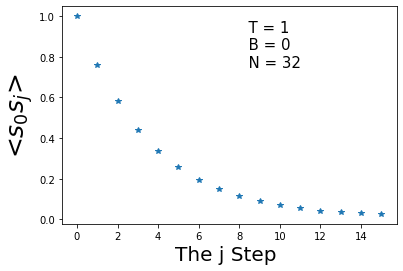

In [19]:
correlation_func(T=1,B=0,N=32)
print('Decay exponentially')

## Please try several $N$, $T$, $B$. What is the largest $N$ you can go? What is the lowest $T$ you can go?


The largest N can get with  T = 1 is N =629
 We cannot run N = 630


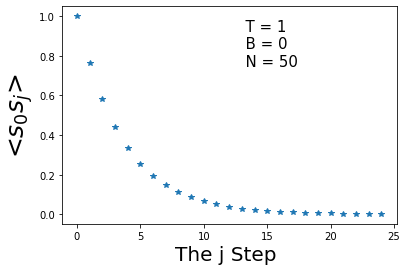

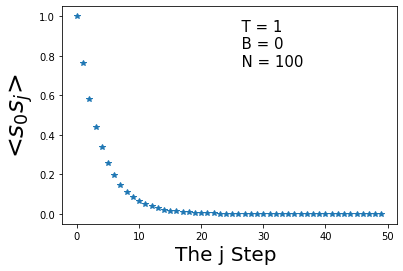

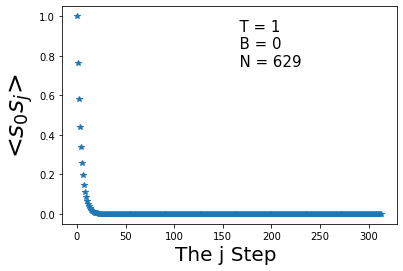

In [20]:
correlation_func(T=1,B=0,N=50)
correlation_func(T=1,B=0,N=100)
correlation_func(T=1,B=0,N=629)
print('\nThe largest N can get with  T = 1 is N =629\n We cannot run N = 630')

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in matmul
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in matmul
C:\Users\dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:1574: RuntimeWarning: overflow encountered in reduce
  return asarray(a).trace(offset=offset, axis1=axis1, axis2=axis2, dtype=dtype, out=out)
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in matmul


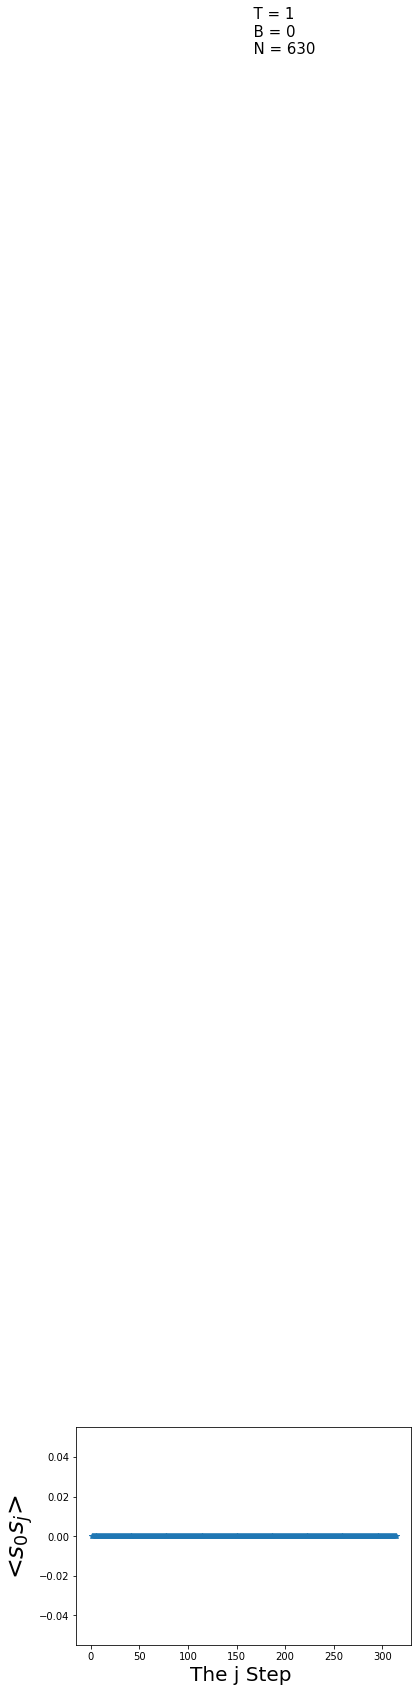

In [21]:
correlation_func(T=1,B=0,N=630)

The largest N can get with  T = 1 is N =629  We cannot run N = 630

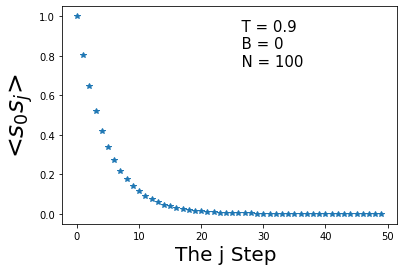

In [22]:
correlation_func(T=0.9,B=0,N=100)

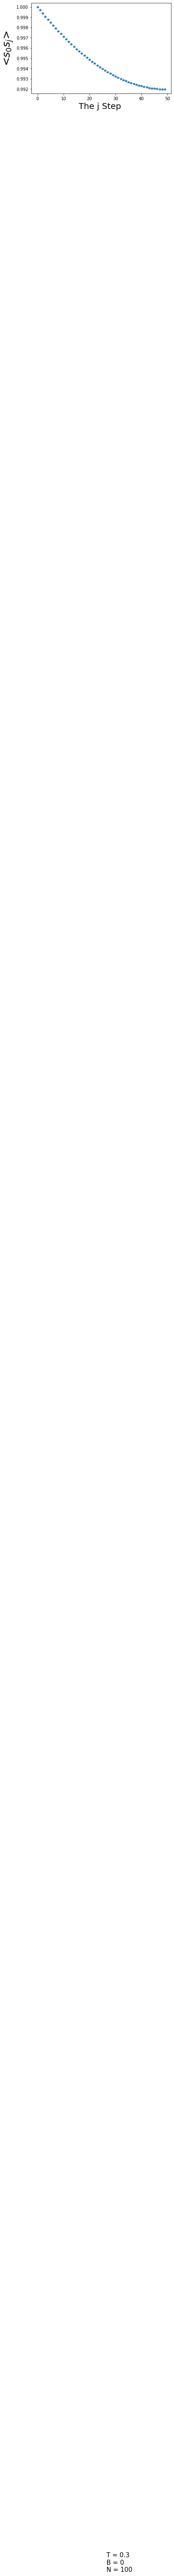

In [23]:
correlation_func(T=0.3,B=0,N=100)

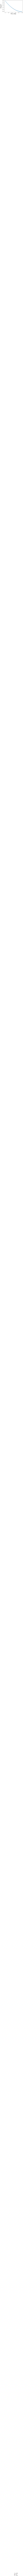

In [24]:
correlation_func(T=0.26,B=0,N=100)

In [25]:
correlation_func(T=0.25,B=0,N=100)

ValueError: Image size of 430x87941 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

The lowest B can get with N = 100 is T=0.26 We cannot run T=0.25